# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


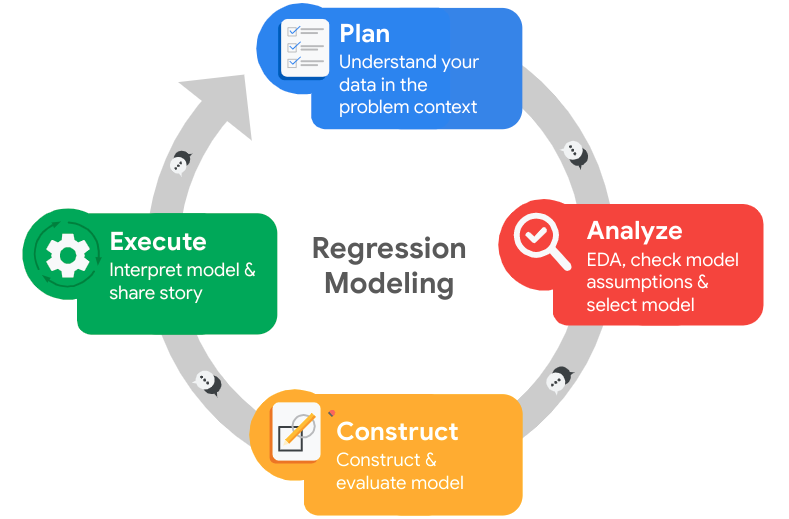

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [71]:
# Import packages

# Data manip.
import numpy as np
import pandas as pd

# Data visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Scikit learn packages have been imported at the construct phase.

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [50]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe

df0 = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe

df0.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [51]:
# Gather basic information about the data

df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [52]:
# Gather descriptive statistics about the data
### YOUR CODE HERE ###
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

As a data cleaning step, rename the columns as needed.

In [53]:
# Display all column names

df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [54]:
# Rename columns as needed


df0 = df0.rename(columns={'average_montly_hours': 'average_monthly_hours'}) # This column is spelt incorrectly.


# Display all column names after the update


df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [55]:

df0.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [56]:
# Check for duplicates
### YOUR CODE HERE ###
df0.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
14994     True
14995     True
14996     True
14997     True
14998     True
Length: 14999, dtype: bool

In [57]:
# Inspect some rows containing duplicates as needed

df0.loc[14998]
df0.loc[14997]
df0.loc[14996]
df0.loc[14995]


satisfaction_level          0.37
last_evaluation             0.48
number_project                 2
average_monthly_hours        160
time_spend_company             3
Work_accident                  0
left                           1
promotion_last_5years          0
Department               support
salary                       low
Name: 14995, dtype: object

In [72]:
# Drop duplicates and save resulting dataframe in a new variable as needed
### YOUR CODE HERE ###
df1 = df0.drop_duplicates() #dropna WILL DROP ANY ROWS WITH MISSING COLUMNS. WE ONLY WANT TO DROP DUPLICATES.
salary_dummies = pd.get_dummies(df1['salary'], prefix='salary' )
df1 = pd.concat([df1, salary_dummies], axis=1)
dept_dummies = pd.get_dummies(df1['Department'], prefix='dept' )
df1 = pd.concat([df1, dept_dummies], axis=1)

# Since we encoded both department and salary. Drop them before constructing the model, after we get visualizations
# and trends.


# Display first few rows of new dataframe as needed
### YOUR CODE HERE ###
df1.head(50)



,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary,...,dept_IT,dept_RandD,dept_accounting,dept_hr,dept_management,dept_marketing,dept_product_mng,dept_sales,dept_support,dept_technical
0,0.38,0.53,2,157,3,0,1,0,sales,low,...,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,sales,medium,...,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,sales,medium,...,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,sales,low,...,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,sales,low,...,0,0,0,0,0,0,0,1,0,0
5,0.41,0.50,2,153,3,0,1,0,sales,low,...,0,0,0,0,0,0,0,1,0,0
6,0.10,0.77,6,247,4,0,1,0,sales,low,...,0,0,0,0,0,0,0,1,0,0
7,0.92,0.85,5,259,5,0,1,0,sales,low,...,0,0,0,0,0,0,0,1,0,0
8,0.89,1.00,5,224,5,0,1,0,sales,low,...,0,0,0,0,0,0,0,1,0,0
9,0.42,0.53,2,142,3,0,1,0,sales,low,...,0,0,0,0,0,0,0,1,0,0


### Check outliers

Check for outliers in the data.

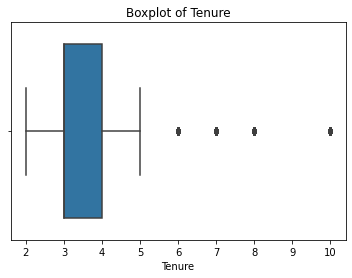

In [59]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
### YOUR CODE HERE ###

sns.boxplot(x=df1['time_spend_company'])
plt.title('Boxplot of Tenure')
plt.xlabel('Tenure')
plt.show()

# There are 4 dots on the boxplot, but this doesnt mean there are 4 outliers. The years spent on a company
# has only been represented as a whole number, so there may be many rows of people who worked those number
# of years.

In [60]:
# Determine the number of rows containing outliers
### YOUR CODE HERE ###

Q1 = df1['time_spend_company'].quantile(0.25)
Q3 = df1['time_spend_company'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find rows where time spent in company is an outlier
outliers = df1[(df1['time_spend_company'] < lower_bound) | (df1['time_spend_company'] > upper_bound)]

# Number of rows containing outliers
num_outliers = outliers.shape[0]

print("Number of people whose number of years is an outlier:", num_outliers)


Number of people whose number of years is an outlier: 824


Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




[Double-click to enter your responses here.]

## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [61]:
# Get numbers of people who left vs. stayed
### YOUR CODE HERE ###
df1['left'].value_counts() # 0 = Stayed
                           # 1 = Left

# Get percentages of people who left vs. stayed
### YOUR CODE HERE ###
df1.shape #11992 total rows

num_stayed = (df1['left'] == 0).sum()
percent_stayed = num_stayed / 11992

num_left = (df1['left'] == 1).sum()
percent_left = num_left / 11992

print("Percent stayed:", percent_stayed, "     Percent left:", percent_left)

Percent stayed: 0.8338892595063375      Percent left: 0.1660273515677118


### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

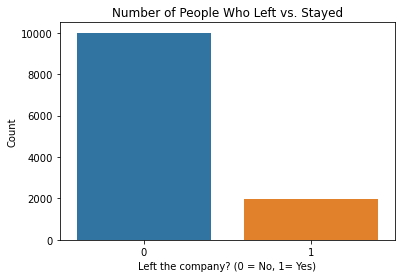

In [62]:
# Create a plot as needed
### YOUR CODE HERE ###
plt.figure(figsize=(6, 4))
sns.countplot(x='left', data=df1)
plt.title('Number of People Who Left vs. Stayed')
plt.xlabel('Left the company? (0 = No, 1= Yes)')
plt.ylabel('Count')
plt.show()

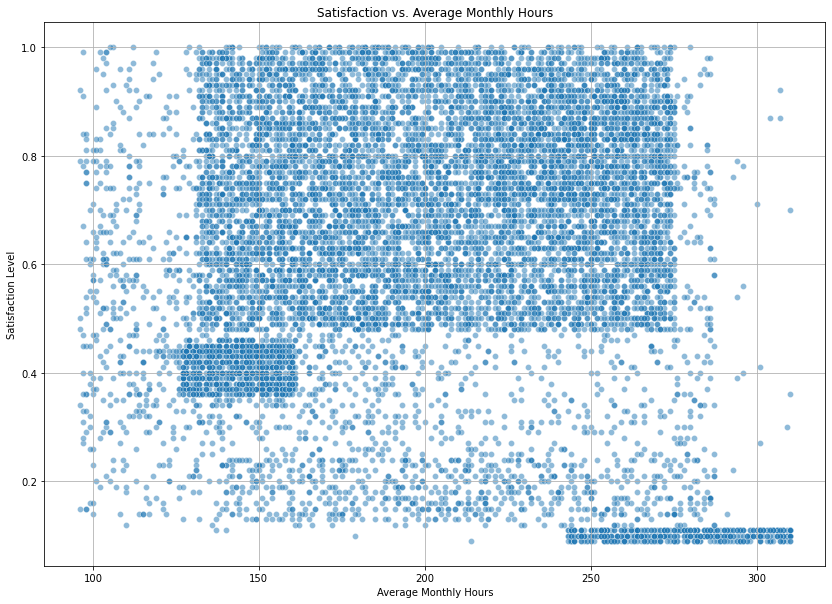

In [63]:
# Create a plot as needed
### YOUR CODE HERE ###
plt.figure(figsize=(14, 10))
sns.scatterplot(x='average_monthly_hours', y='satisfaction_level', data=df1, alpha=0.5)
plt.title('Satisfaction vs. Average Monthly Hours')
plt.xlabel('Average Monthly Hours')
plt.ylabel('Satisfaction Level')
plt.grid(True)
plt.show()

# Plot seems kind of scattered all over the place... no serious correlation between the two.

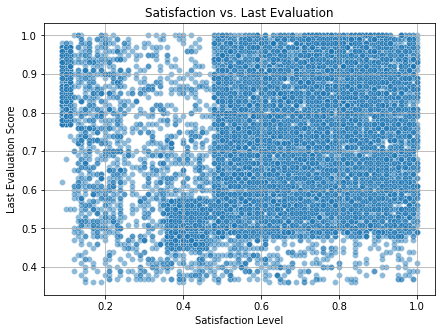

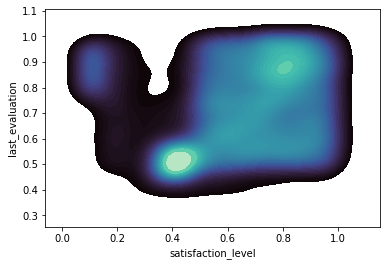

In [64]:
# Create a plot as needed
### YOUR CODE HERE ###
plt.figure(figsize=(7, 5))
sns.scatterplot(x='satisfaction_level', y='last_evaluation', data=df1, alpha=0.5)
plt.title('Satisfaction vs. Last Evaluation')
plt.xlabel('Satisfaction Level')
plt.ylabel('Last Evaluation Score')
plt.grid(True)
plt.show()

#

sns.kdeplot(
    data=df1,
    x='satisfaction_level',
    y='last_evaluation',
    fill=True,
    cmap='mako',
    thresh=0.05,
    levels=50
)
# Density chart
# This density plot can show us where most of the points are concentrated in, we see that the most common last evaluation was .5,
# and the satisfaction score for a lot of them went down to roughly .4.
# The next most dense area is where people scored a .9 on the last evaluation only to score a .8 now.

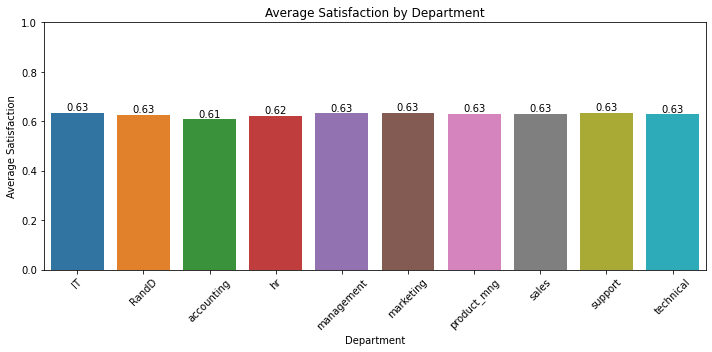

,Department,satisfaction_level,rank
0,IT,0.634016,3
1,RandD,0.627176,8
2,accounting,0.607939,10
3,hr,0.621947,9
4,management,0.631995,4
5,marketing,0.634770,2
6,product_mng,0.629825,6
7,sales,0.631349,5
8,support,0.634822,1
9,technical,0.627937,7


In [67]:
# Create a plot as needed
### YOUR CODE HERE ###
# Group and calculate mean
avg_satisfaction = df1.groupby('Department')['satisfaction_level'].mean().reset_index()

# Plot
plt.figure(figsize=(10, 5))
ax = sns.barplot(x='Department', y='satisfaction_level', data=avg_satisfaction, ci=None)

# Add labels
for index, row in avg_satisfaction.iterrows():
    ax.text(index, row['satisfaction_level'] + 0.01, f"{row['satisfaction_level']:.2f}", 
            color='black', ha='center')

plt.title('Average Satisfaction by Department')
plt.xlabel('Department')
plt.ylabel('Average Satisfaction')
plt.xticks(rotation=45)
plt.ylim(0, 1)  # optional, for better spacing
plt.tight_layout()
plt.show()

avg_satisfaction['rank'] = avg_satisfaction['satisfaction_level'] \
                            .rank(method='dense', ascending=False) \
                            .astype(int)

avg_satisfaction
# Out of all the departments, there seems to be the lowest satisfaction in the accounting department.

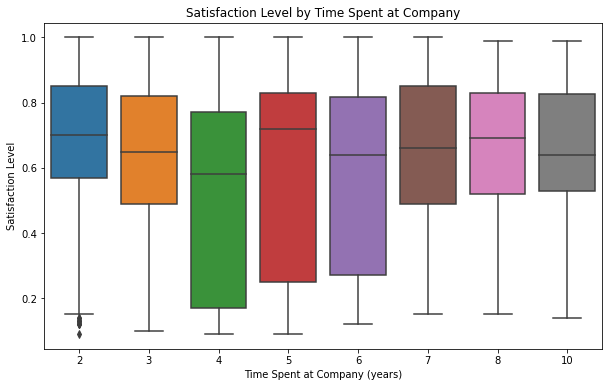

In [68]:
# Create a plot as needed
### YOUR CODE HERE ###
plt.figure(figsize=(10, 6))
sns.boxplot(x='time_spend_company', y='satisfaction_level', data=df1)
plt.title('Satisfaction Level by Time Spent at Company')
plt.xlabel('Time Spent at Company (years)')
plt.ylabel('Satisfaction Level')
plt.show()

# Satisfaction seems to generally drop around the 4th year of employment but then slowly rises
# beyond 4 years.

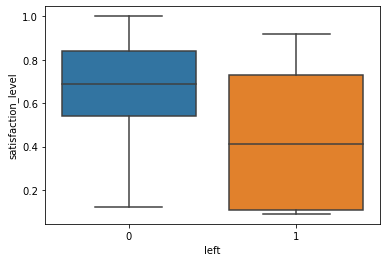

In [69]:
# Create a plot as needed
### YOUR CODE HERE ###
sns.boxplot(x='left', y='satisfaction_level', data=df1)

# Median satisfaction level for people who left is approximately .4.
# Median satisfaction level for people who are still with the company is approximately .68.

### Insights

[What insights can you gather from the plots you created to visualize the data? Double-click to enter your responses here.]

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

Since our outcome variable is the 'left' column, we are trying to predict whether an employee will leave the company, which only has two outcomes (leave, or stay). Since there are only two outcomes to the outcome variable, it would make sense to use classification, as our outcome variable is categorical. Regression isn't feasible since the outcome variable were working on is not continuous.

Binary classification is the prediction task we are working with.

### Identify the types of models most appropriate for this task.

Models appropriate for binary classification is 

Logistic Regression
Random Forest Classifier
Gradient Boosting
Naive Bayes

### Modeling

Add as many cells as you need to conduct the modeling process.

Accuracy: 0.8328470195914964
Confusion Matrix:
 [[1929   69]
 [ 332   69]]
                  Feature  Coefficient
0      satisfaction_level    -3.881258
7             salary_high    -1.391539
5           Work_accident    -1.317813
6   promotion_last_5years    -0.788640
1         last_evaluation     0.646226
8              salary_low     0.522916
11             dept_RandD    -0.447893
14        dept_management    -0.301966
4      time_spend_company     0.300733
2          number_project    -0.261710
13                dept_hr     0.108457
10                dept_IT    -0.099779
9           salary_medium     0.068184
12        dept_accounting    -0.064071
16       dept_product_mng    -0.049553
15         dept_marketing     0.047116
17             dept_sales    -0.034691
18           dept_support     0.025043
19         dept_technical     0.016899
3   average_monthly_hours     0.003771


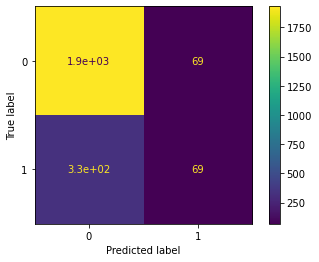

In [103]:
### YOUR CODE HERE ###

# Since we encoded both department and salary. Drop them to avoid model training errors.



# After deciding we need a logistic regression model,
# these are the necessary packages to make such a model and its visualizations.

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
#from sklearn.metrics import accuracy_score, confusion_matrix
import sklearn.metrics as metrics

# Since our outcome variable is 'left', lets split that column
# from the rest of the dataset. x = predictor (rest of df), y = response ('left' column)
predictor_variables = df1.drop('left', axis=1)
response_variable = df1['left']

# Split into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(predictor_variables, response_variable, test_size=0.2, random_state=42)


# Officially instantiate logistic regression model
model = LogisticRegression(solver='liblinear') # Our model wouldn't fit
                                               # due to a 'str' to 'decode' error.
                                               # Using liblinear solver fixes this
                                               # since the approach is much simpler
                                               # compared to lbfgs.


# Fit the model using the training data
model.fit(X_train, y_train)

# Use the train model to make predictions on the data we assigned for testing.
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred)) # Percent of the time
                                                   # the model accuractely
                                                   # predicted whether an 
                                                   # employee left or stayed.

cm = metrics.confusion_matrix(y_test, y_pred, labels = model.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = model.classes_)
disp.plot() # Remember, 0 was stay, 1 was left. 00 in the matrix is true negative,
            # model correctly predicted employee would stay. 01 meant 


print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred)) # Confusion matrix in print form.

# Extract the coefficients of the trained logistic regression model.
# model.coef_ returns a 2D array (for multiclass), so take the first row for binary classification.
coefficients = model.coef_[0]

# Get the feature (predictor variable) names from the training data columns.
feature_names = X_train.columns

# Create a DataFrame to organize features and their corresponding coefficients.
coef_df = pd.DataFrame({
    'Feature': feature_names,         # Column with feature names
    'Coefficient': coefficients       # Column with model coefficients for each feature
})

# Calculate the absolute value of each coefficient and add it as a new column.
# This helps to rank features by strength of influence regardless of direction.
coef_df['abs_coef'] = coef_df['Coefficient'].abs()

# Sort the DataFrame by the absolute coefficient value in descending order.
# This shows the features with the strongest impact on the model prediction at the top.
coef_df_sorted = coef_df.sort_values(by='abs_coef', ascending=False)

# Print the sorted DataFrame showing only the feature names and their coefficients.
# This allows us to see which features most strongly influence the model, positive or negative.
print(coef_df_sorted[['Feature', 'Coefficient']])


# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



The biggest thing we found is that how happy someone is at work really, really affects whether they stick around or quit. If people are more satisfied, they’re way less likely to leave.

Money also matters — folks who get paid well tend to stay, while those with lower pay are more likely to think about leaving.

Getting promoted helps too. If someone sees a chance to move up, they’re more likely to stick around.

One weird thing we saw is that people who had work accidents were actually less likely to quit. That sounds strange, but maybe those folks get extra support or benefits that make them want to stay. It’s something we’d want to look into more.

Other stuff, like which department someone works in, how many projects they have, or how long they’ve been there, also affects things but not as much as the stuff mentioned above.

## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results

So, after running the numbers, the model basically told us the most important factors in employee turnover. The most significant thing? People who are content with their jobs tend to stay on the job longer. Next, income matters: a greater wage deters people from leaving, while a lower salary encourages them to find another job. People are also more likely to stay when they get promoted, which makes logical because nobody wants to stay if they can't advance.

One unexpected finding was that those who experienced a job injury were actually less likely to quit. That's strange, but perhaps those workers receive better assistance or become more devoted as a result. Although not nearly as much, other factors like the department they work in, the number of projects they manage, or their length of service at the organization do have an impact.

### Conclusion, Recommendations, Next Steps

Moving forward, it’d be a good idea to ask employees directly what’s making them happy or unhappy through surveys or just quick chats. The company should also take a look at pay and promotion policies to see if anything needs fixing. We should make sure support programs after accidents are working well too. And if we use the model to spot people who might be thinking about leaving, managers can reach out before it’s too late. Finally, keeping an eye on the data and updating the model over time will help catch new issues early and keep improving how we handle this.